In [54]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [55]:
class SOM():
    
    def __init__(self, teachers, N, seed=None):
        self.teachers = np.array(teachers) #teacher関数の作成(入力データを教えてくれる)
        self.n_teacher = self.teachers.shape[0] #おそらく、teacherのデータ数
        self.N = N #マップの大きさ
        if not seed is None:
            np.random.seed(seed) #seedが指定されていれば、seedを取得
            
        x, y = np.meshgrid(range(self.N), range(self.N)) # xは、[0,1,2,...19]が20個　yは、[0,0,0,...,0][1,1,1,1...,1]を19まで
        self.c = np.hstack((x.flatten()[:, np.newaxis],
                            y.flatten()[:, np.newaxis]))#xとyを合わせて座標軸の作成array[[0,1],[0,2],...,[19,19]]
        self.nodes = np.random.rand(self.N*self.N,
                                    self.teachers.shape[1])#19*19の三値の乱数を作成一次元配列
    
    
        #W(t+1)=W(t)+Φ(t)L(t)(V(t)-W(t))
        
    def train(self):
        for i, teacher in enumerate(self.teachers): #self.techers の中にある全ての要素をteacherとして取り出し #iはtとして
            bmu = self._best_matching_unit(teacher) #bmuを見つける座標をbmuに格納
            d = np.linalg.norm(self.c - bmu, axis=1) #dの中にはbmuと各点間の距離を格納している
            L = self._learning_ratio(i) #ここの中にL(t)を格納
            S = self._learning_radius(i, d) #ここの中にΦ(t)を格納
            self.nodes += L * S[:, np.newaxis] * (teacher - self.nodes) #W(t)（Sは場所に依存する配列）
        return self.nodes        #compute all norms (square)


    def _best_matching_unit(self, teacher):
        norms = np.linalg.norm(self.nodes - teacher, axis=1) #全てのノードとteacherを比較して、ノルムを計算
        bmu = np.argmin(norms) #argment with minimum element　normsのなかで一番小さいノルムを取得 ここで返すのは、インデックスのみ
        return np.unravel_index(bmu,(self.N, self.N)) #返す値は、インデックス番号がどれに値するかという情報

    #σ(t)
    def _neighbourhood(self, t):#neighbourhood radious 更新するノード数は徐々に減っていく
        halflife = float(self.n_teacher/4) #for testing
        initial  = float(self.N/2) #initial=20/2=10
        return initial*np.exp(-t/halflife) #10exp(-t/250)のレートで下がっていくt=0で10,t=250で5
    
    #L(t)
    def _learning_ratio(self, t): #learning関数
        halflife = float(self.n_teacher/4) #for testing
        initial  = 0.1
        return initial*np.exp(-t/halflife) #初期の更新係数は0.1そこから、だんだん更新度合いは減少していく
    
    #Φ(t)=exp((-dist^2)/(2σ^2(t)))
    #distはBMUからの距離でいい
    def _learning_radius(self, t, d):
        # d is distance from BMU
        s = self._neighbourhood(t) #sは、時間tの近傍半径
        return np.exp(-d**2/(2*s**2))  #近傍関数の値を返す（近ければ近いほど、大きい）Sも配列になる
    

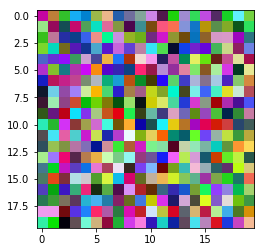

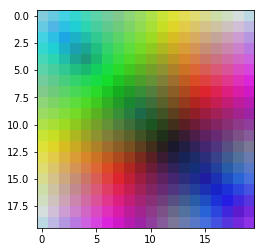

In [66]:
N = 20
teachers = np.random.rand(100000, 3)
som = SOM(teachers, N=20, seed=10)

# Initial map
plt.imshow(som.nodes.reshape((N, N, 3)),
           interpolation='none')
plt.show()

# Train
som.train()

# Trained MAP
plt.imshow(som.nodes.reshape((N, N, 3)),
           interpolation='none')
plt.show()

In [69]:
som.nodes.reshape((N, N, 3))

array([[[ 0.51719296,  0.80275184,  0.86068555],
        [ 0.40196757,  0.79843979,  0.88989102],
        [ 0.26208566,  0.82579013,  0.89176625],
        ..., 
        [ 0.81175057,  0.8739292 ,  0.75806282],
        [ 0.83628241,  0.87063221,  0.8677183 ],
        [ 0.73754074,  0.84899634,  0.89379645]],

       [[ 0.40197121,  0.79849095,  0.88975687],
        [ 0.31423669,  0.71855185,  0.90021797],
        [ 0.17399924,  0.7557093 ,  0.90113108],
        ..., 
        [ 0.80524466,  0.76704108,  0.74056629],
        [ 0.82021069,  0.75049581,  0.84486022],
        [ 0.74485594,  0.72744318,  0.88930581]],

       [[ 0.26203771,  0.82569407,  0.89184682],
        [ 0.17415102,  0.75587618,  0.90108277],
        [ 0.11185291,  0.65244008,  0.89633451],
        ..., 
        [ 0.79994752,  0.63780725,  0.71034232],
        [ 0.80567575,  0.61453539,  0.82882339],
        [ 0.71106075,  0.59166961,  0.883981  ]],

       ..., 
       [[ 0.8119323 ,  0.87397779,  0.75827512],
        

In [58]:
norms = np.linalg.norm(som.nodes - som.teachers[0], axis=1)
bmu = np.argmin(norms)
np.unravel_index(bmu,(som.N, som.N))

(19, 19)

In [67]:
som.nodes

array([[ 0.51719296,  0.80275184,  0.86068555],
       [ 0.40196757,  0.79843979,  0.88989102],
       [ 0.26208566,  0.82579013,  0.89176625],
       ..., 
       [ 0.34013801,  0.21048083,  0.87338434],
       [ 0.46257197,  0.1564063 ,  0.86411044],
       [ 0.56463874,  0.19556056,  0.90051101]])

In [65]:
hello = np.array(0,0)

TypeError: data type not understood

In [64]:
hello

array([0, 0])